In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
X = scipy.io.loadmat('../data/data_train.mat')['data_train']
y = scipy.io.loadmat('../data/label_train.mat')['label_train'].flatten()

In [5]:
X_test = scipy.io.loadmat('../data/data_test.mat')['data_test']

In [6]:
print(f"X shape       : {X.shape}")
print(f"y shape       : {y.shape}")
print(f"X_test shape  : {X_test.shape}")

X shape       : (301, 33)
y shape       : (301,)
X_test shape  : (50, 33)


In [7]:
print(f"Classes       : {np.unique(y)}")
print(f"Class +1 count: {np.sum(y ==  1)}")
print(f"Class -1 count: {np.sum(y == -1)}")

Classes       : [-1  1]
Class +1 count: 195
Class -1 count: 106


In [9]:
print(f"\nNaN values in X      : {np.isnan(X).sum()}")
print(f"Inf values in X      : {np.isinf(X).sum()}")
print(f"NaN values in X_test : {np.isnan(X_test).sum()}")
print(f"Inf values in X_test : {np.isinf(X_test).sum()}")


NaN values in X      : 0
Inf values in X      : 0
NaN values in X_test : 0
Inf values in X_test : 0


In [10]:
# distance matrix 
D = cdist(X, X, metric='euclidean')

In [11]:
print(f"Shape           : {D.shape}")
print(f"d_max           : {D.max():.4f}")
print(f"d_min (nonzero) : {D[D > 0].min():.4f}")
print(f"d_mean          : {D.mean():.4f}")

Shape           : (301, 301)
d_max           : 17.9523
d_min (nonzero) : 0.1938
d_mean          : 7.4617


In [19]:
np.fill_diagonal(D, np.inf)          # temporarily ignore self-distance
nearest_distances = np.min(D, axis=1)  # closest neighbor per sample
sigma_min = np.median(nearest_distances)
np.fill_diagonal(D, 0) 
print(f"sigma_min : {sigma_min:.4f}")

sigma_min : 1.6018


In [20]:
sigma_max = D.max()
print(f"sigma_max : {sigma_max:.4f}")
print(f"Ratio     : {sigma_max / sigma_min:.2f}")

sigma_max : 17.9523
Ratio     : 11.21


In [21]:
sigma_coarse = np.logspace(np.log10(sigma_min), np.log10(sigma_max),   5)

print("\n5 COARSE SIGMA CANDIDATES:")
for i, s in enumerate(sigma_coarse, 1):
    print(f"  σ_{i} = {s:.4f}")


5 COARSE SIGMA CANDIDATES:
  σ_1 = 1.6018
  σ_2 = 2.9309
  σ_3 = 5.3625
  σ_4 = 9.8117
  σ_5 = 17.9523


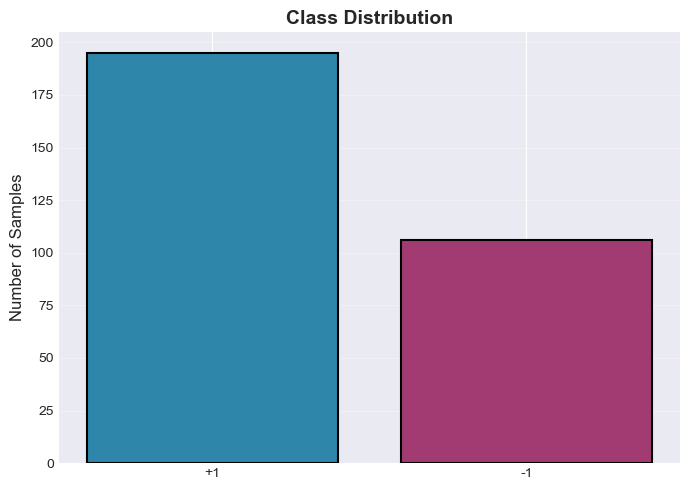

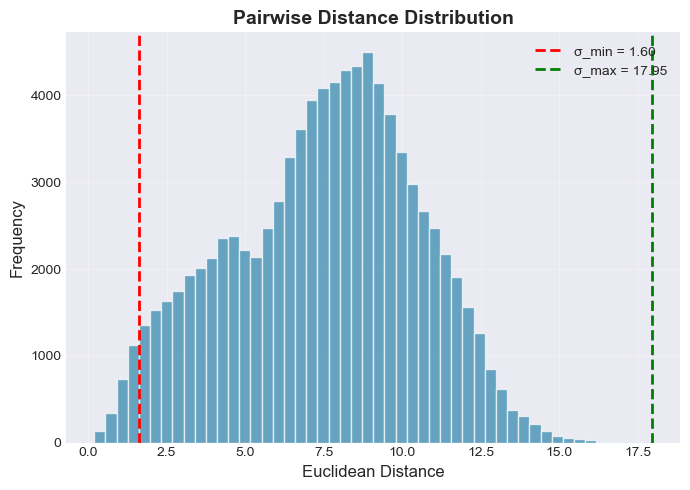

In [27]:
fig1, ax1 = plt.subplots(figsize=(7, 5))


ax1.bar(['+1', '-1'],  [np.sum(y == 1), np.sum(y == -1)], color=['#2E86AB', '#A23B72'],edgecolor='black', linewidth=1.5)
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/01_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

fig2, ax2 = plt.subplots(figsize=(7, 5))

ax2.hist(D[D > 0].flatten(), bins=50, color='#2E86AB',  edgecolor='white', alpha=0.7)
ax2.axvline(sigma_min, color='red', linestyle='--',  linewidth=2, label=f'σ_min = {sigma_min:.2f}')
ax2.axvline(sigma_max, color='green', linestyle='--', linewidth=2, label=f'σ_max = {sigma_max:.2f}')
ax2.set_title('Pairwise Distance Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Euclidean Distance', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/01_distance_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
